In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from calc_footprint_FFP_adjusted01 import FFP

In [70]:
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

from matplotlib.path import Path

import rasterio
import rasterio.plot
import rasterio.mask

import geopandas as gpd
from numpy import ma

In [26]:
a = FFP()

In [115]:
output = a.output(zm=9., umean=3, h=1000, ol=-50, sigmav=0.6, ustar=0.2, wind_dir=180,rs= [0.3,0.5,0.9],crop=False, fig=False)

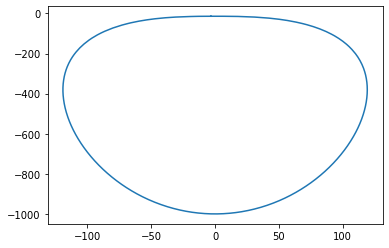

In [116]:
plt.plot(output[8][2], output[9][2])

In [117]:
# (x, y) da torre para Sirgas 2000 23S
x_utm=203917.07880027
y_utm=7545463.6805863

In [118]:
tif_file = '..\..\iab3_site\IAB1_SIRGAS_23S.tif'

In [119]:
poly = [(i+x_utm, j+y_utm) for i, j in zip(output[8][2], output[9][2])]
poly_shp = Polygon(poly)

gdf = gpd.GeoDataFrame({'a':['teste01'], 'geometry':poly_shp})

In [120]:
raster = rasterio.open(tif_file)

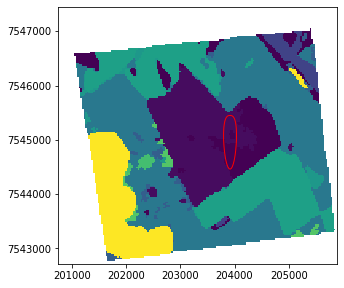

In [121]:
fig, ax = plt.subplots(figsize=(5,5))
rasterio.plot.show(raster, ax=ax)
gdf.plot(ax=ax, edgecolor='red', facecolor='none')

In [122]:
mask_teste = rasterio.mask.mask(raster, [poly_shp], crop=True, invert=False)

In [123]:
unique, counts = np.unique(mask_teste[0], return_counts=True)

In [124]:
dict(zip(unique,counts))

{3: 112, 4: 105, 255: 98}

In [113]:
I = plt.imread(tif_file)

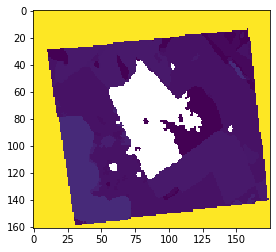

In [114]:
plt.imshow(ma.masked_where(I==4, I))

### Significado dos numeros do raster (geotiff)
- **3**: Floresta Natural => Formação Florestal
- **4**: Floresta Natural=> Formação Savânica
- **9**: Floresta Plantada
- **12**: Formação Campestre/Outra Formação não Florestal
- **15**: Pastagem
- **19**: Agricultura => Cultivo Anual e Perene
- **20**: Agricultura => Cultivo Semi-Perene
- **24**: Infraestrutura Urbana
- **25**: Outra área não Vegetada
- **33**: Corpo d'água
- **255**: Ignorar


In [127]:
significado_pixel = {3: 'Floresta Natural => Formação Florestal',
                     4: 'Floesta Natural => Formação Savânica',
                     9: 'Floresta Plantada',
                     12: 'Formação Campestre/Outra formação não Florestal',
                     15: 'Pastagem',
                     19: 'Agricultura => Cultivo Anual e Perene',
                     20: 'Agricultura => Cultivo Semi-Perene',
                     24: 'Infraestrutura Urbana',
                     25: 'Outra área não Vegetada',
                     33: "Corpo d'água",
                     255: 'Fora do escopo'}

In [181]:
list(significado_pixel)

[3, 4, 9, 12, 15, 19, 20, 24, 25, 33, 255]

In [198]:
print('{0},{11}'.format(*significado_pixel.values(),3 ))

Floresta Natural => Formação Florestal,3


In [135]:
pixels = dict(zip(unique,counts))

In [ ]:
def stats_pixel(pixels_dict):
    floresta = pixels_dict

In [155]:
list(pixels.keys())

[3, 4, 255]

In [157]:
pixels.values()

dict_values([112, 105, 98])

In [158]:
for i in pixels.items():
    print(i)

(3, 112)
(4, 105)
(255, 98)


In [163]:
pixels[3] + pixels[4]

217

In [203]:
pixel_list = []
for i in significado_pixel:
#     print(i, significado_pixel[i])
    try:
#         print(pixels[i])
        pixel_list.append(pixels[i])
    except:
#         print(0)
        pixel_list.append(0)

print('Floresta',pixel_list[0] + pixel_list[1])
print('Outros', sum(pixel_list[2:-1]))

Floresta 217
Outros 0


In [174]:
pixel_list

[112, 105, 0, 0, 0, 0, 0, 0, 0, 0, 98]